In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:

# Ground truth and calculated values
ground_truth = np.array([703, 369, 705, 388, 421, 446, 398, 364, 302, 369])
calculated = np.array([703, 320, 645, 364, 389, 465, 378, 345, 263, 340])

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(ground_truth - calculated))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((ground_truth - calculated)**2))

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((ground_truth - calculated) / ground_truth)) * 100

# R-squared (R²)
ss_res = np.sum((ground_truth - calculated) ** 2)
ss_tot = np.sum((ground_truth - np.mean(ground_truth)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

mae, rmse, mape, r_squared

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r_squared:.2f}")

Mean Absolute Error (MAE): 29.10
Root Mean Squared Error (RMSE): 33.29
Mean Absolute Percentage Error (MAPE): 7.09%
R-squared (R²): 0.94


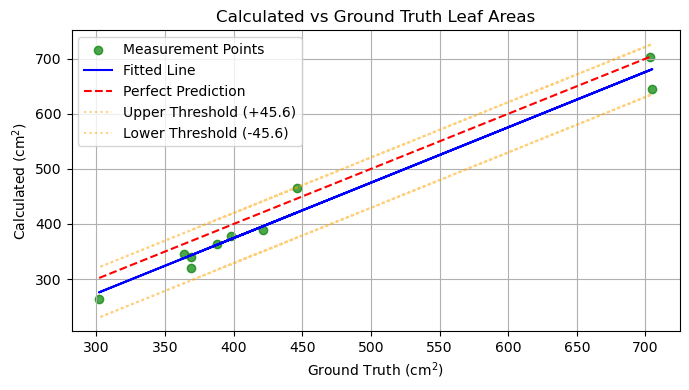

Plot saved as: /Users/noahbucher/Documents/Uni/Master Thesis/Writing/graphs/results/Calculated_vs_Ground_Truth_Leaf_Areas.png


In [21]:


# Create a DataFrame to store the data
df = pd.DataFrame({
    'ground_truth': ground_truth,
    'calculated': calculated
})

# Fit a line to the points using numpy's polyfit function
slope, intercept = np.polyfit(df['ground_truth'], df['calculated'], 1)

# Generate the fitted line values
df['line_fit'] = slope * df['ground_truth'] + intercept

# Calculate residuals (difference between actual and predicted values)
df['residuals'] = df['calculated'] - df['line_fit']

# Set a threshold for filtering based on residuals (2 * standard deviation)
threshold = 2 * df['residuals'].std()

# Filter data for points within the threshold (points to keep)
df_filtered = df[df['residuals'].abs() <= threshold]

# Points that will be removed (residuals outside the threshold)
df_removed = df[df['residuals'].abs() > threshold]

# Create the plot
plt.figure(figsize=(7, 4))

# Scatter plot of points to keep (in green)
plt.scatter(df_filtered['ground_truth'], df_filtered['calculated'], alpha=0.7, color='green', label='Measurement Points')

# Scatter plot of points to be removed (in red)
# plt.scatter(df_removed['ground_truth'], df_removed['calculated'], alpha=0.7, color='red', label='Removed Points')

# Plot the line of best fit
plt.plot(df['ground_truth'], df['line_fit'], color='blue', label='Fitted Line')

# Plot the perfect prediction line (y = x)
plt.plot(
    [df['ground_truth'].min(), df['ground_truth'].max()],
    [df['ground_truth'].min(), df['ground_truth'].max()],
    color='red', linestyle='--', label='Perfect Prediction'
)

# Add threshold lines (above and below the fitted line)
plt.plot(df['ground_truth'], df['line_fit'] + threshold, color='orange', linestyle=':', label=f'Upper Threshold (+{threshold:.1f})', alpha=0.5)
plt.plot(df['ground_truth'], df['line_fit'] - threshold, color='orange', linestyle=':', label=f'Lower Threshold (-{threshold:.1f})', alpha=0.5)

# Add title and labels
plt.title('Calculated vs Ground Truth Leaf Areas')
plt.xlabel(r'Ground Truth (cm$^2$)')
plt.ylabel(r'Calculated (cm$^2$)')
plt.legend()
plt.grid(True)

# Adjust layout to avoid cut-offs
plt.tight_layout()

# Define the folder where you want to save the plot
save_folder = '/Users/noahbucher/Documents/Uni/Master Thesis/Writing/graphs/results/'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# Generate the file name from the plot title
file_name = plt.gca().get_title().replace(' ', '_').replace(':', '').replace('/', '') + '.png'

# Combine the folder path and the file name
save_path = os.path.join(save_folder, file_name)

# Save the plot with bbox_inches='tight' to avoid cutting off any part of the plot
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f'Plot saved as: {save_path}')
